### Caso de Clasificación con MLPClassifier - Alan Franquez

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.drop("target", axis=1)
y = df["target"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.01]
}

mlp = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("🔎 Mejores parámetros encontrados:")
print(grid_search.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
🔎 Mejores parámetros encontrados:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}


✅ Precisión del modelo MLPClassifier en conjunto de prueba: 0.9667


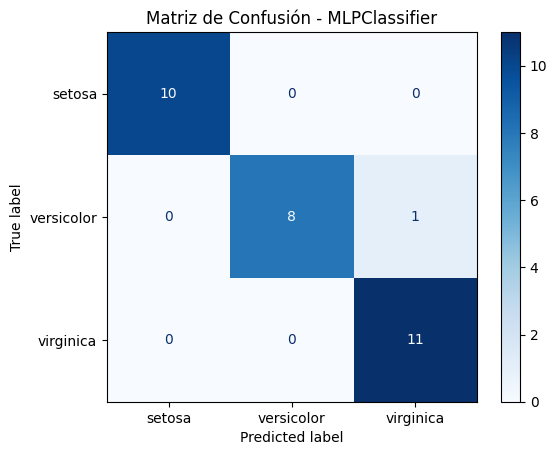

In [4]:
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo MLPClassifier en conjunto de prueba: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - MLPClassifier")
plt.show()


,Modelo,Precisión
0,Regresión Logística,0.930000
1,Random Forest,0.960000
2,SVM (RBF),0.970000
3,MLPClassifier,0.966667


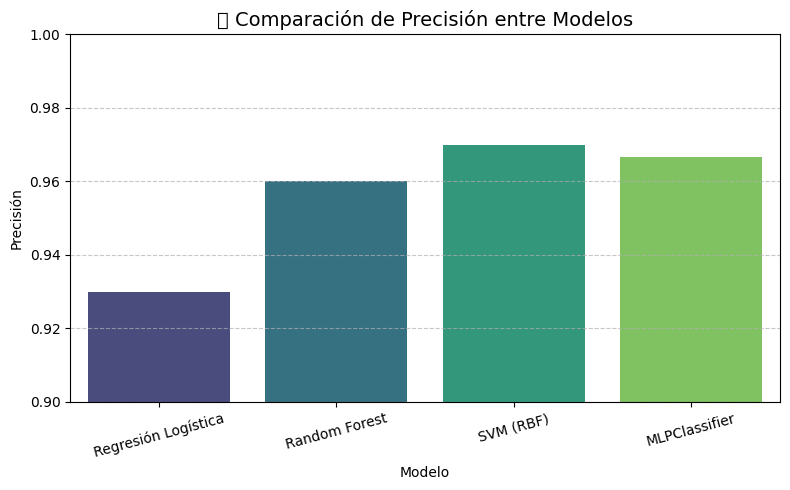

In [5]:
resultados_modelos = {
    "Regresión Logística": 0.93,
    "Random Forest": 0.96,
    "SVM (RBF)": 0.97,
    "MLPClassifier": accuracy
}

df_resultados = pd.DataFrame(list(resultados_modelos.items()), columns=["Modelo", "Precisión"])
display(df_resultados)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_resultados, x="Modelo", y="Precisión", palette="viridis")
plt.title("📊 Comparación de Precisión entre Modelos", fontsize=14)
plt.ylim(0.9, 1.0)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()